# Fit a complex model

Let's fit a complex model coming from the chemical engineering field.

## Select model

We select the modified Crank diffusion model:

In [1]:
import numpy as np
from scifit.solvers.specials import CrankDiffusionFitSolver

Which solve the diffusion of chemical through a sphere:

$$\gamma(t) = \frac{C(t,R)}{C(0,R)} = \frac{\alpha}{1 + \alpha} + 6 \alpha \sum\limits_{i=1}^\infty \frac{\exp \left(-\mathcal{D}\frac{q_n^2 t}{R^2}\right)}{9(\alpha + 1) + \alpha^2q_n^2}$$

Where the $q_n$ terms are solution of a rational trigonometric equation such as:

$$\forall q_n \in \mathbb{R}^+_0 \, | \, \tan(q_n) = \frac{3 q_n}{3 + \alpha q_n^2}$$

And the modified $\alpha$ coefficient equals to:

$$\alpha = \frac{V_l}{V_s} \rightarrow \alpha' = \frac{V_l}{V_s K_p}$$


Now create a new solver with two physical known parameters:

In [2]:
solver = CrankDiffusionFitSolver(alpha=3.9, radius=1.9e-3)

## Load data

Now we generate some synthetic dataset for the given problem:

In [3]:
X = solver.feature_dataset(xmin=1e0, xmax=1e6, dimension=1, resolution=20, mode="log")

We select some parameters to regress:

In [4]:
p = np.array([3.9, 2e-11])

In [5]:
t = solver.target_dataset(X, *p, sigma=0.075, scale_mode="auto", seed=1234, full_output=True)

In [6]:
y = t["ydata"]
s = t["sigmas"]

## Solve Fit

Everything is setup, we can solve our problem:

In [7]:
solution = solver.fit(X, y, p0=np.array([1.0, 1e-10]), sigma=s)

C:\Users\developer\AppData\Roaming\Python\Python39\site-packages\scifit\solvers\specials.py:94: RuntimeWarning: overflow encountered in exp
  return np.exp(-(D * t * qn**2) / (self.radius**2)) / (


In [8]:
solver.solved()

True

In [9]:
print(solution["message"])

Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000


In [10]:
print(solution["parameters"])

[3.90198946e+00 2.03542866e-11]


In [11]:
print(np.diag(solution["covariance"]))

[1.55459006e-02 5.95187729e-24]


As we can see, parameters have been properly regressed.

## Render solution

Finally we can render fit and loss function to check the dynamic:

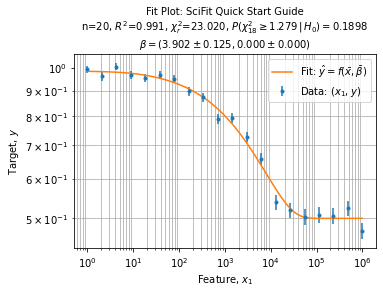

In [12]:
axe = solver.plot_fit(title="SciFit Quick Start Guide", log_x=True, log_y=True)
axe.grid(which="both")

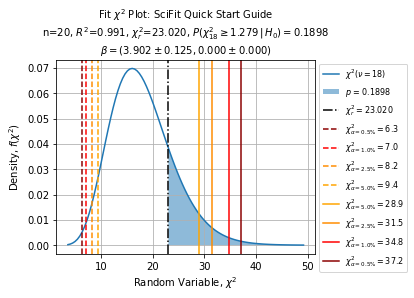

In [13]:
axe = solver.plot_chi_square(title="SciFit Quick Start Guide")

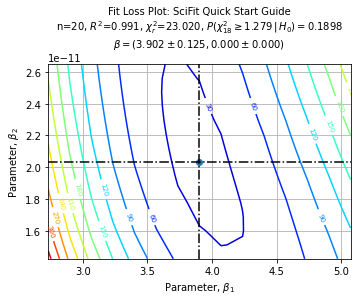

In [14]:
axe = solver.plot_loss(title="SciFit Quick Start Guide", resolution=15)

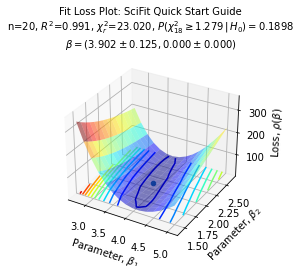

In [15]:
axe = solver.plot_loss_low_dimension(title="SciFit Quick Start Guide", resolution=15, surface=True)